In [ ]:
!unzip '/content/NationalNames.csv.zip'

Archive:  /content/NationalNames.csv.zip
  inflating: NationalNames.csv       


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [ ]:
data=pd.read_csv('/content/NationalNames.csv')

In [ ]:
data.shape

(1825433, 5)

In [ ]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [ ]:
data['Name']

0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
1825428       Zykeem
1825429       Zymeer
1825430      Zymiere
1825431        Zyran
1825432        Zyrin
Name: Name, Length: 1825433, dtype: object

In [ ]:
data['Name'].unique()

array(['Mary', 'Anna', 'Emma', ..., 'Zijun', 'Zilas', 'Zirui'],
      dtype=object)

In [ ]:
data['Gender']=data['Gender'].astype('category').cat.codes

In [ ]:
df=data.groupby('Name').mean()['Gender'].reset_index()

In [ ]:
df['Gender'].astype('int')

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0
...,...,...
93884,Zytavious,1.0
93885,Zyvion,1.0
93886,Zyyanna,0.0
93887,Zyyon,1.0


In [29]:
df= data.groupby('Name').mean()['Gender'].reset_index()

In [31]:
df.shape

(93889, 2)

In [32]:
df.head()

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0


In [33]:
df['Gender']=df['Gender'].astype('int')

In [34]:
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [35]:
import string

In [36]:
letters=list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [37]:
vocab=dict(zip(letters,range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [38]:
R_vocab=dict(zip(range(1,27),letters))
R_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [39]:
def word_to_number() :
  for i in range(0,df.shape[0]):
     seq=[ vocab[letters.lower()] for letters in df['Name'][i]]
     df['Name'][i]=seq

In [40]:
word_to_number()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [42]:
# to determine the maximum number of box length (or) input length

In [43]:
X=df['Name'].values
Y=df['Gender'].values

In [44]:
name_length=[len(X[i]) for i in range (0, df.shape[0])]

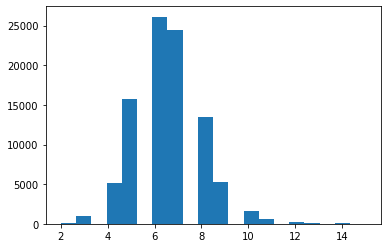

In [45]:
plt.hist(name_length,bins=20)
plt.show()

In [46]:
from keras.preprocessing.sequence import pad_sequences
x=pad_sequences(df['Name'].values,maxlen=10,padding='pre')

In [72]:
a = [[1,2,8,9,74,54,52,4,7,78,54,12,5],[1,2,8,9,74,54,52,4,7,78,54,12,5],[1,2,8,9,74,54,52,4,7,78,54,12,5]]
x=pad_sequences(np.array(a),maxlen=10,padding='post')

In [73]:
x

array([[ 9, 74, 54, 52,  4,  7, 78, 54, 12,  5],
       [ 9, 74, 54, 52,  4,  7, 78, 54, 12,  5],
       [ 9, 74, 54, 52,  4,  7, 78, 54, 12,  5]], dtype=int32)

In [48]:
# creating model
from keras.layers import Input,Embedding,Dense,LSTM

In [54]:
from keras.models import Sequential,Model

In [50]:
vocab_size=len(vocab)+1
vocab_size

27

In [55]:
# input layer
inp=Input(shape=(10,))
emn=Embedding(27,5)(inp)
lstm1=LSTM(units=32,return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)
out=Dense(units=1,
          activation='sigmoid')(lstm2)

my_model=Model(inputs=inp,
               outputs=out)

In [56]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 10, 5)             135       
                                                                 
 lstm_2 (LSTM)               (None, 10, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [57]:
my_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [58]:
his=my_model.fit(x,Y,epochs=10, batch_size=256,validation_split=0.2)

Epoch 1/10
294/294 [==============================] - 16s 37ms/step - loss: 0.5587 - acc: 0.7163 - val_loss: 0.4352 - val_acc: 0.8078
Epoch 2/10
294/294 [==============================] - 10s 34ms/step - loss: 0.4161 - acc: 0.8038 - val_loss: 0.3905 - val_acc: 0.8189
Epoch 3/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3994 - acc: 0.8107 - val_loss: 0.3844 - val_acc: 0.8238
Epoch 4/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3908 - acc: 0.8168 - val_loss: 0.3841 - val_acc: 0.8234
Epoch 5/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3868 - acc: 0.8182 - val_loss: 0.3839 - val_acc: 0.8227
Epoch 6/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3837 - acc: 0.8202 - val_loss: 0.3798 - val_acc: 0.8235
Epoch 7/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3796 - acc: 0.8231 - val_loss: 0.3781 - val_acc: 0.8278
Epoch 8/10
294/294 [==============================] - 10s 34ms

In [74]:
# autoenocoders

In [78]:
from keras.models import Model
from keras.layers import Dense,Input
from keras.datasets import mnist
import numpy as np
import pandas as pd

In [79]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255

In [80]:
x_test=x_test/255

In [81]:
x_train.shape

(60000, 28, 28)

In [84]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]**2))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]**2))

In [ ]:
input_image=Input(shape=(784,))
encoded=Dense(32,activation='relu')(input_image)
decoded=Dense(784,activation='relu')(enocded)